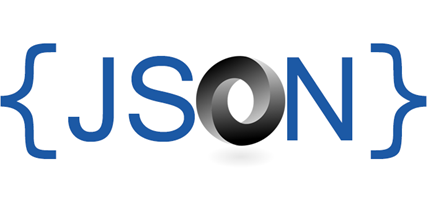

일반적으로 서버에서 클라이언트로 데이터를 보낼 때 사용하는 양식. 클라이언트가 사용하는 언어에 관계 없이 통일된 데이터를 주고받을 수 있도록, 일정한 패턴을 지닌 문자열을 생성해 내보내면 클라이언트는 그를 해석해 데이터를 자기만의 방식으로 온전히 저장, 표시할 수 있게 된다.

- What is JSON?
    - JSON stands for ___JavaScript Object Notation___
    - JS Object is simillar with dictionary
    - Designed for ___human-readable data___ interchange
    - Extended from the JavaScript scripting language
    - JSON Internet Media type is application/json, extention is .json
    
- Why use JSON?
    - Used for serializing and transmitting structured data over network connection 직렬화, 전송

- Characteristics
    - Easy to read and write
    - Programming Language independent
    - A lightweight text-based interchange format 키 밸류만 보내서 경량화됨

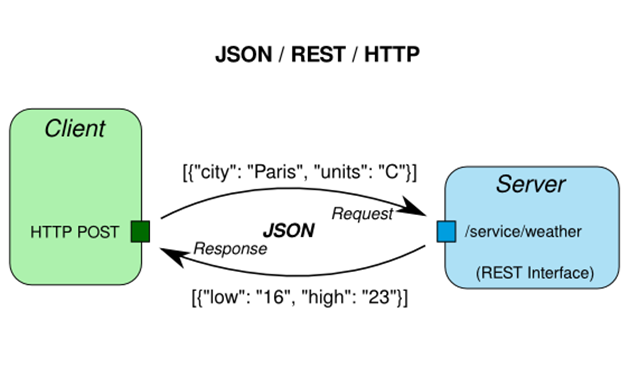

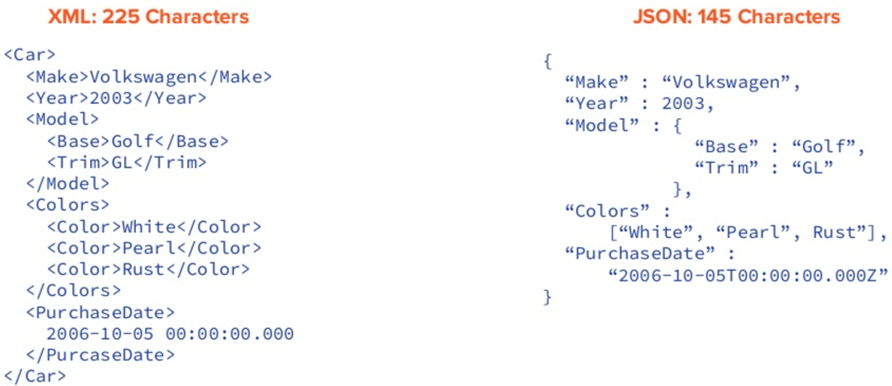

최근엔 JSON으로 다 바꾸는 추세

- JSON Concept

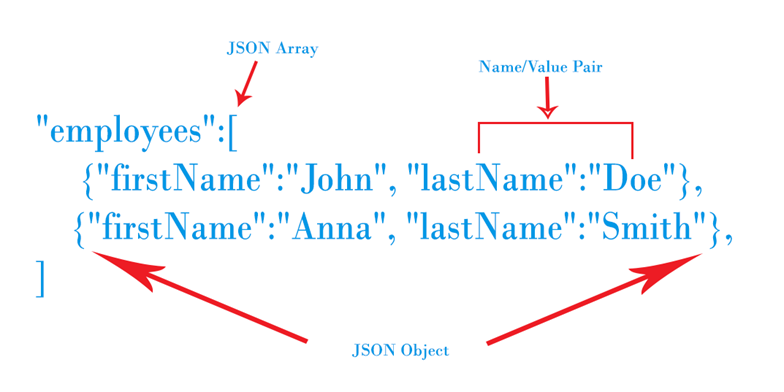

    - JSON Object
        - name, value pairs
    - JSON Array
        - Ordered collections


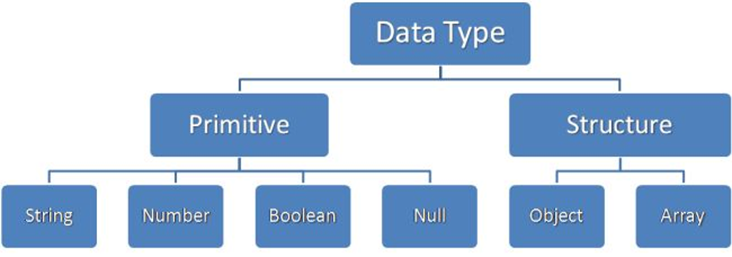

- JSON Hierarchy

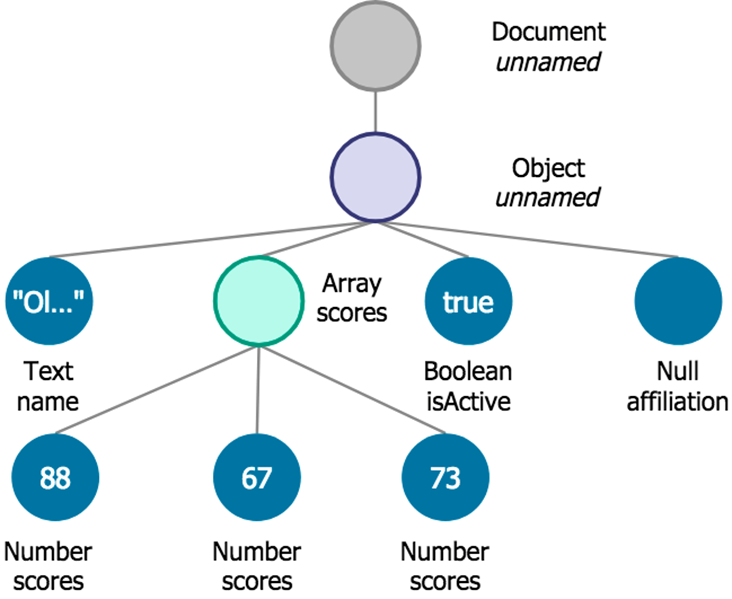

- JSON with Python
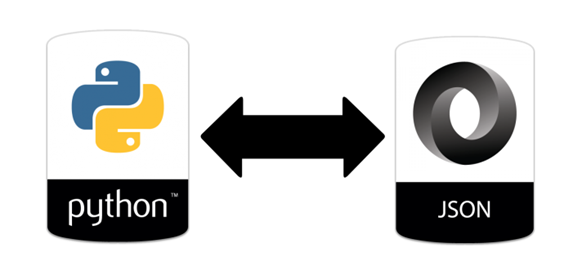

In [1]:
import json

- Encoding
    - dump, dumps # 인자에 fp 유무가 차이점
   
- Decoding
    - load, loads #역시 인자에 fp유무가 차이


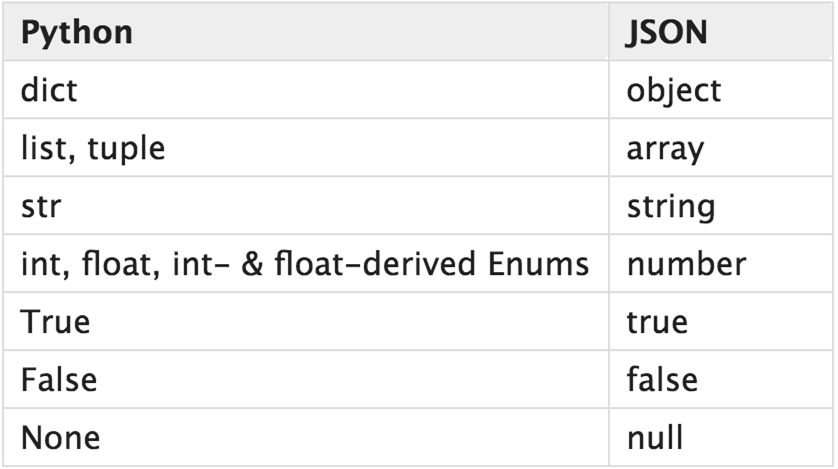
대부분 1:1로 매핑가능

In [3]:
name = ("Kim", "Lee", "Park")
age = [30,28,31]
person = {"name":"Kim", "age":30, "car":False}

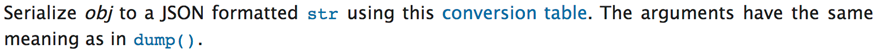

In [4]:
nameStr = json.dumps(name)
ageStr = json.dumps(age)
personStr = json.dumps(person, indent= "    ")

In [10]:
type(nameStr)

str

In [8]:
print(personStr)

{
    "name": "Kim",
    "age": 30,
    "car": false
}


In [11]:
kname = ('김','이','박')
knameStr = json.dumps(kname) #유니코드의 바이트화
print(knameStr)

["\uae40", "\uc774", "\ubc15"]


In [12]:
knameStr = json.dumps(kname, ensure_ascii = False) 
print(knameStr) #바이트화 안하면 그대로 찍힘

["김", "이", "박"]


In [14]:
personObj = json.loads(personStr)

In [15]:
type(personObj)

dict

- 파일에 dump

In [16]:
personObj['car'] = ['레이','모닝']
personObj

{'age': 30, 'car': ['레이', '모닝'], 'name': 'Kim'}

In [17]:
with open("test.json", 'w') as fp:
    json.dump(personObj, fp)

In [18]:
with open('test.json','r') as fp:
    loadObj = json.load(fp) 

In [19]:
loadObj #유니코드도 잘읽어옴

{'age': 30, 'car': ['레이', '모닝'], 'name': 'Kim'}

In [21]:
import json
import urllib.request

url = "https://jsonplaceholder.typicode.com/posts/1"

In [37]:
resq = urllib.request.urlopen(url,)
print(type(resq))

<class 'http.client.HTTPResponse'>


In [28]:
text = resq.read() 
print(type(text))#바이트단위로 받아옴
text

<class 'bytes'>


b'{\n  "userId": 1,\n  "id": 1,\n  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",\n  "body": "quia et suscipit\\nsuscipit recusandae consequuntur expedita et cum\\nreprehenderit molestiae ut ut quas totam\\nnostrum rerum est autem sunt rem eveniet architecto"\n}'

In [29]:
textStr = text.decode("utf-8")

In [33]:
respObj = json.loads(textStr)
print(type(respObj))
print(respObj)

<class 'dict'>
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [34]:
respObj['title']

'sunt aut facere repellat provident occaecati excepturi optio reprehenderit'

In [36]:
for k,v in respObj.items():
    print(k,v)
    print(type(v)) #밸류 객체의 타입은 아직 모르니 주의 필요(nested 됐을 가능성)

userId 1
<class 'int'>
id 1
<class 'int'>
title sunt aut facere repellat provident occaecati excepturi optio reprehenderit
<class 'str'>
body quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
<class 'str'>


#### 예제
한국환경공단_대기오염정보 조회 서비스

시도별 실시간 측정정보 조회

https://www.data.go.kr/dataset/15000581/openapi.do

In [62]:
import json
import urllib.request
import urllib.parse

In [60]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty?"

In [61]:
url

'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty?'

In [115]:
params = {
    'serviceKey' : "TG%2FEJr%2F47wQsd1jC33zgwMs%2By4F85D9ICCh32kI99AmRf4rm4ZxYtcdx%2FLIcEr8jPz3ifS0bDmbhBA%2F9vGdMYQ%3D%3D",
    'numOfRows' :10,
    'pageSize' :10,
    'pageNo' :1,
    'startPage':1,
    'sidoName':None,
    'ver':'1.3',
    '_returnType':'json'
}

In [116]:
params['sidoName'] = '서울'
# 서울, 부산, 대구, 인천, 광주, 대전, 울산, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주, 세종

In [117]:
params

{'_returnType': 'json',
 'numOfRows': 10,
 'pageNo': 1,
 'pageSize': 10,
 'serviceKey': 'TG%2FEJr%2F47wQsd1jC33zgwMs%2By4F85D9ICCh32kI99AmRf4rm4ZxYtcdx%2FLIcEr8jPz3ifS0bDmbhBA%2F9vGdMYQ%3D%3D',
 'sidoName': '서울',
 'startPage': 1,
 'ver': '1.3'}

In [128]:
# 서비스키는 우선 unquote 해줘야 이후에 알맞은 값이 나옴
# 아니면 SERVICE KEY IS NOT REGISTERED ERROR.
params['serviceKey']  = urllib.parse.unquote(params['serviceKey']) 

In [129]:
paramUrl = urllib.parse.urlencode(params) #parms을 짤라서 url(스트링)으로 변환

In [130]:
print(type(paramUrl)) #결과는 str
paramUrl

<class 'str'>


'serviceKey=TG%2FEJr%2F47wQsd1jC33zgwMs%2By4F85D9ICCh32kI99AmRf4rm4ZxYtcdx%2FLIcEr8jPz3ifS0bDmbhBA%2F9vGdMYQ%3D%3D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&sidoName=%EC%84%9C%EC%9A%B8&ver=1.3&_returnType=json'

In [131]:
paramBytes = paramUrl.encode("utf-8") #request에 str 전달불가, bytes타입으로 바꿔줘야 

In [132]:
paramBytes

b'serviceKey=TG%2FEJr%2F47wQsd1jC33zgwMs%2By4F85D9ICCh32kI99AmRf4rm4ZxYtcdx%2FLIcEr8jPz3ifS0bDmbhBA%2F9vGdMYQ%3D%3D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&sidoName=%EC%84%9C%EC%9A%B8&ver=1.3&_returnType=json'

In [133]:
req = urllib.request.Request(url, data=paramBytes) #paramBytes인자로 Request 객체만든다
req

In [134]:
res = urllib.request.urlopen(req)
type(res)

http.client.HTTPResponse

In [135]:
result = res.read()

In [136]:
result 

b'{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.3","dataTerm":"","dataTime":"2018-07-13 16:00","khaiGrade":"2","khaiValue":"53","mangName":"\xeb\x8f\x84\xec\x8b\x9c\xeb\x8c\x80\xea\xb8\xb0","no2Grade":"1","no2Value":"0.017","numOfRows":"10","o3Grade":"2","o3Value":"0.034","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"17","pm10Value24":"20","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"11","pm25Value24":"12","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"1","so2Value":"0.004","stationCode":"","stationName":"\xec\xa4\x91\xea\xb5\xac","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2018-07-13 16:00","khaiGrade":"2","khaiValue":"66","mangName":"\xeb\x8f\x84\xeb\xa1\x9c\xeb\xb3\x80\xeb\x8c\x80\xea\xb8\xb0","no2Grade":"2","no2Value":"0.040","numOfRows":"10","o3Grade":"1","o3Value":"0.025","pageNo":"1","pm10Grade":"2","pm10Grade1h":"2","pm10Value":"31","pm10Value24":"32","pm25

In [125]:
type(result)

bytes

In [126]:
resultStr = result.decode("utf-8") #다시 str으로 디코드 해줘야
type(resultStr)

str

In [127]:
resultObj = json.loads(resultStr) #json인 resultStr을 파이썬 오브젝트(dict)로 로드

for k,v in resultObj.items():
    print(k,v)

list [{'_returnType': 'json', 'coGrade': '1', 'coValue': '0.3', 'dataTerm': '', 'dataTime': '2018-07-13 16:00', 'khaiGrade': '2', 'khaiValue': '53', 'mangName': '도시대기', 'no2Grade': '1', 'no2Value': '0.017', 'numOfRows': '10', 'o3Grade': '2', 'o3Value': '0.034', 'pageNo': '1', 'pm10Grade': '1', 'pm10Grade1h': '1', 'pm10Value': '17', 'pm10Value24': '20', 'pm25Grade': '1', 'pm25Grade1h': '1', 'pm25Value': '11', 'pm25Value24': '12', 'resultCode': '', 'resultMsg': '', 'rnum': 0, 'serviceKey': '', 'sidoName': '', 'so2Grade': '1', 'so2Value': '0.004', 'stationCode': '', 'stationName': '중구', 'totalCount': '', 'ver': ''}, {'_returnType': 'json', 'coGrade': '1', 'coValue': '0.5', 'dataTerm': '', 'dataTime': '2018-07-13 16:00', 'khaiGrade': '2', 'khaiValue': '66', 'mangName': '도로변대기', 'no2Grade': '2', 'no2Value': '0.040', 'numOfRows': '10', 'o3Grade': '1', 'o3Value': '0.025', 'pageNo': '1', 'pm10Grade': '2', 'pm10Grade1h': '2', 'pm10Value': '31', 'pm10Value24': '32', 'pm25Grade': '1', 'pm25Grade1

### XML

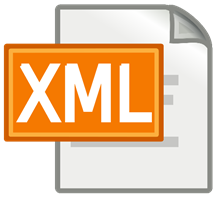

- What is XML?
    - 완벽하게 사람이 볼수있는 마크업 언어
    - 원하는 태그달아 관리
    - XML stands for eXtensible Markup Language
    - Designed to store and transport data
    - Designed to be both human- and machine-readable
    - XML is a W3C Recommendation


- Why use XML?
    - json과 마찬가지로 스트링이기에 바이트화해서 주고받기 가능
    - Universally accepted standard way of structuring data
    - Provides a well-defined structure for communication
    - Software- and hardware-independent tool for storing and transporting data

- Characteristics
    - ___Text-based (Unicode)___
        - more readable, easier to document, easier to debug
    - ___No predefined tags___
        - the author must define both the tags and the document structure
    - Extensible
        - supporting rich structure, like objects or hierarchies or relationships 
        - most XML applications will work as expected even if new data is added (or removed).
    - Validity
        - supporting validation and well-formed properties
        - validation 제공하기에 엄격하게 지켜야하는 장단점
        - Well-formed Doc
        - DTD(Doc type Definition) 명시 잘해줘야

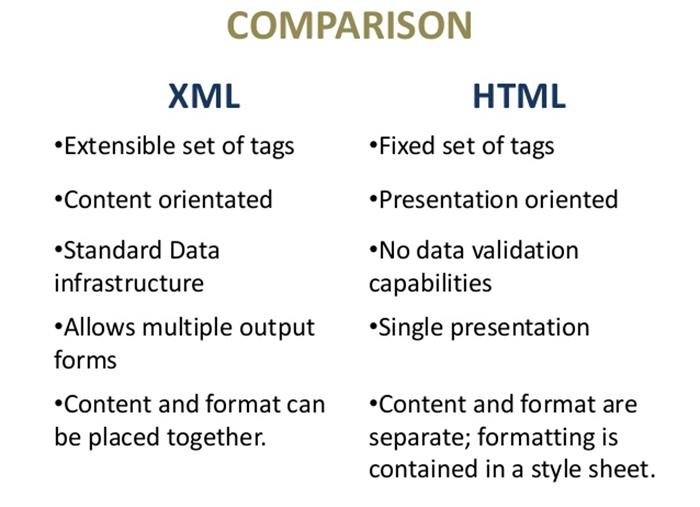

- XML vs JSON

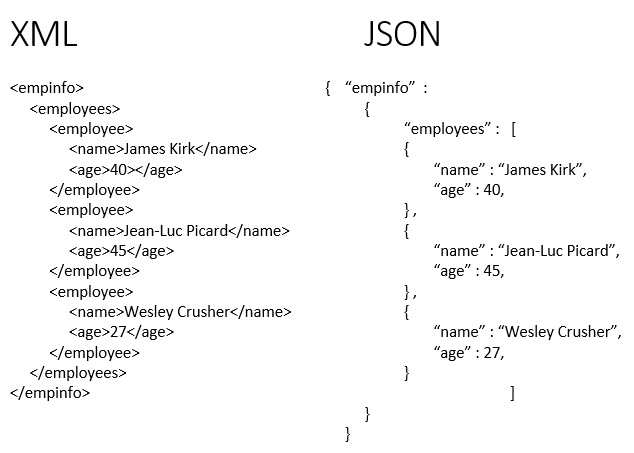

- Syntax
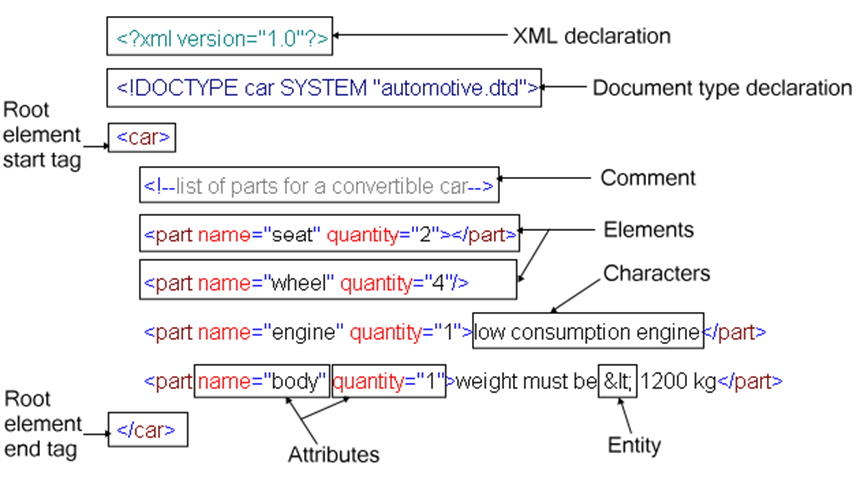

- DOM
    - The DOM defines a standard for accessing and manipulating documents
        - A standard object model for XML
        - A standard programming interface for XML
        - Platform- and language-independent
        - A W3C standard

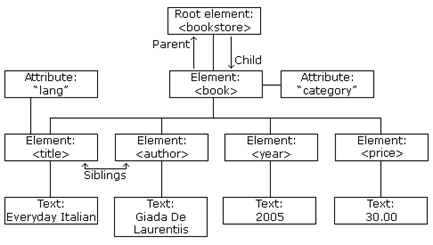

- XPath
    - XPath is a major element in the XSLT standard.
    - XPath can be used to navigate through elements and attributes in an XML document
    - Xpath를 통해 돔트리의 특정 노드에 접근 가능해 매우 중요하다
    
    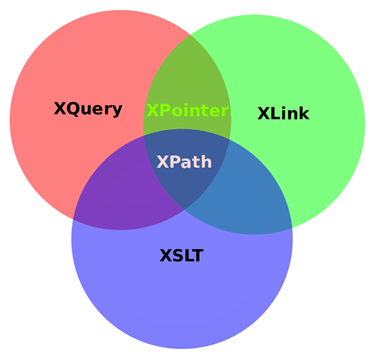

- Syntax

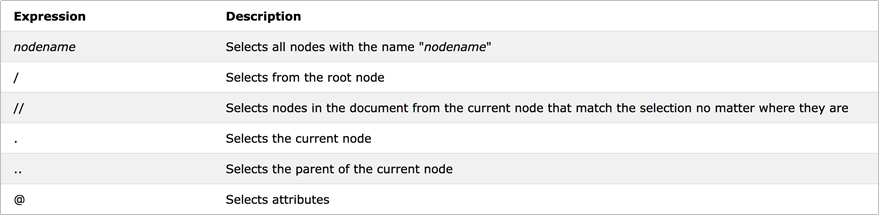

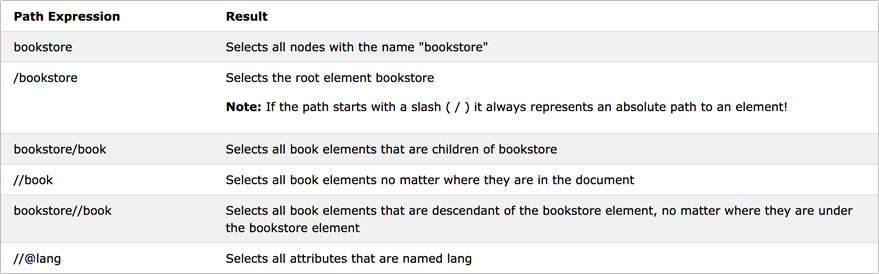

#### XML with Python
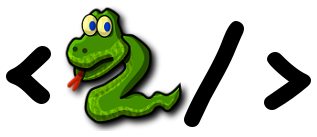

In [137]:
#import xml.etree.ElementTree as et
from lxml import etree #어차피 lxml쓴다

##### lxml
C기반 -> 속도빠르다

- Element
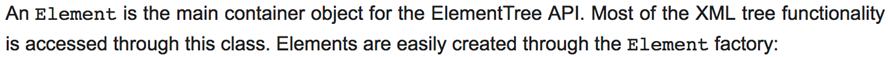

In [138]:
bookStore = etree.Element("bookstore") #root 노드에 해당

In [139]:
#subElement 생성
book1 = etree.SubElement(bookStore, 'book')
book2 = etree.SubElement(bookStore, 'book', attrib = {"category":"children"} )

In [141]:
book1.attrib['category'] = "cooking"

In [146]:
etree.dump(bookStore) #Element를 표준출력으로 써줌

<bookstore>
  <book category="cooking"/>
  <book category="children"/>
</bookstore>


In [147]:
title1 = etree.Element("title", lang = "en") #title 태그에 lang이라는 옵션
title1.text = "Harry Porter"

In [148]:
etree.dump(title1)

<title lang="en">Harry Porter</title>


In [149]:
book2.append(title1)

In [151]:
etree.SubElement(book1,"title", attrib={"lang":title1.get("lang")})

<Element title at 0x16c3dd7bf48>

In [152]:
etree.dump(bookStore)

<bookstore>
  <book category="cooking">
    <title lang="en"/>
  </book>
  <book category="children">
    <title lang="en">Harry Porter</title>
  </book>
</bookstore>


In [161]:
xmlByte = etree.tostring(bookStore, encoding = "utf-8", xml_declaration =True)

In [162]:
type(xmlByte)

bytes

In [163]:
print(xmlByte)

b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<bookstore><book category="cooking"><title lang="en"/></book><book category="children"><title lang="en">Harry Porter</title></book></bookstore>'


In [169]:
# 스트링에서  Elment로 역변환
tmp = etree.fromstring(xmlByte)

In [165]:
tmp

<Element bookstore at 0x16c3df35888>

In [168]:
etree.dump(tmp) 

<bookstore>
  <book category="cooking">
    <title lang="en"/>
  </book>
  <book category="children">
    <title lang="en">Harry Porter</title>
  </book>
</bookstore>


In [170]:
tree = etree.ElementTree(tmp)

In [173]:
root = tree.getroot()

In [174]:
root.tag

'bookstore'

In [181]:
print(tree.docinfo.xml_version)
print(tree.docinfo.encoding)

1.0
utf-8


In [182]:
children = root.getchildren()

In [183]:
for child in children:
    print(child.tag, child.get("category"))

book cooking
book children


#### 예제

In [203]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty?"

In [204]:
params = {
    'serviceKey' : "TG%2FEJr%2F47wQsd1jC33zgwMs%2By4F85D9ICCh32kI99AmRf4rm4ZxYtcdx%2FLIcEr8jPz3ifS0bDmbhBA%2F9vGdMYQ%3D%3D",
    'numOfRows' :10,
    'pageSize' :10,
    'pageNo' :1,
    'startPage':1,
    'sidoName':None,
    'ver':'1.3',
    #'_returnType':'json'
}

params['sidoName'] = '서울'

params['serviceKey']  = urllib.parse.unquote(params['serviceKey']) 

paramUrl = urllib.parse.urlencode(params) #parms을 짤라서 url(스트링)으로 변환

paramBytes = paramUrl.encode("utf-8") #request에 str 전달불가, bytes타입으로 바꿔줘야 

In [205]:
req = urllib.request.Request(url, data=paramBytes) #paramBytes인자로 Request 객체만든다
res = urllib.request.urlopen(req)
result = res.read()
type(result)

HTTPError: HTTP Error 503: Service Temporarily Unavailable

In [201]:
apiEle = etree.fromstring(result)
type(apiEle)

lxml.etree._Element

In [191]:
apiTree = etree.ElementTree(apiEle)

In [192]:
rootNode = apiTree.getroot()

In [193]:
nodeList = rootNode.findall(".//pm10Value")

In [194]:
type(nodeList)

list

In [200]:
for node in nodeList:
    print(node.getparent())
    print(node.tag, node.text)

<Element item at 0x16c3dd23408>
pm10Value -
<Element item at 0x16c3dd23408>
pm10Value 38
<Element item at 0x16c3dd23408>
pm10Value 24
<Element item at 0x16c3dd23408>
pm10Value 36
<Element item at 0x16c3dd23408>
pm10Value 25
<Element item at 0x16c3dd23408>
pm10Value -
<Element item at 0x16c3dd23408>
pm10Value 23
<Element item at 0x16c3dd23408>
pm10Value 28
<Element item at 0x16c3dd23408>
pm10Value 28
<Element item at 0x16c3dd23408>
pm10Value -
